In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


In [3]:
df = pd.read_excel(r"C:\Users\kokila\Downloads\cust_data.xlsx")

In [4]:
df.shape

(30000, 38)

In [5]:
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [6]:
df.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [8]:
df['Orders'].unique()

array([ 7,  0, 10,  4,  6,  9,  1,  8,  5,  3,  2, 11, 12], dtype=int64)

In [9]:
df.isna().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [10]:
df['Gender'].unique()

array(['M', 'F', nan], dtype=object)

In [11]:
df['Gender'].value_counts()

Gender
F    22054
M     5222
Name: count, dtype: int64

In [12]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [13]:
df.isna().sum()

Cust_ID                   0
Gender                    0
Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft           

<Axes: xlabel='Gender', ylabel='count'>

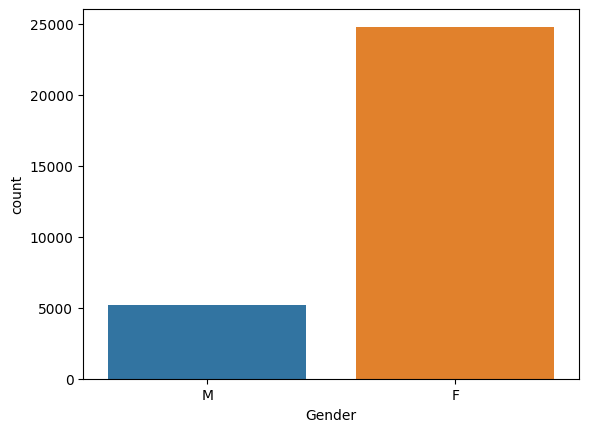

In [14]:
# Plot to check the count of male and female customers
sns.countplot(data=df,x='Gender')

<Axes: xlabel='Orders', ylabel='count'>

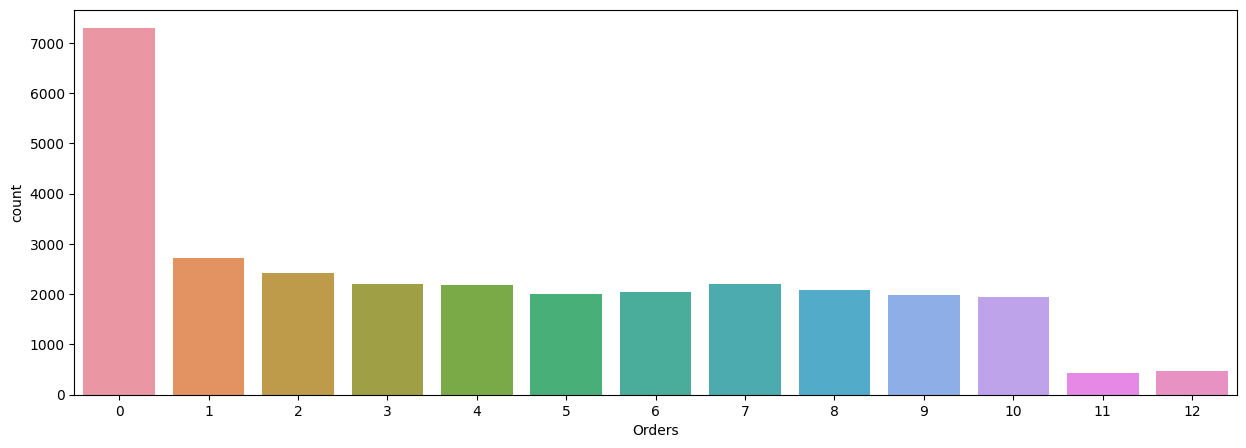

In [15]:
# Overall orders count
plt.figure(figsize=(15,5))
# plt.subplot(1,2,1)
sns.countplot(data=df,x='Orders')

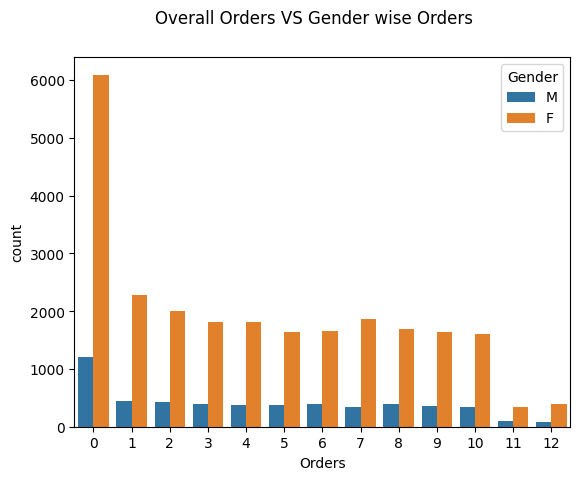

In [16]:
# Orders count by each gender
# plt.subplot(1,2,2)
sns.countplot(data=df,x='Orders',hue='Gender')
plt.suptitle("Overall Orders VS Gender wise Orders")
plt.show()

In [17]:
x = df.iloc[:,2: ].values
x

array([[7, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [7, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [3, 2, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
scale = MinMaxScaler()
features = scale.fit_transform(x)
features

array([[0.58333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.06666667, ..., 0.        , 0.        ,
        0.        ],
       [0.58333333, 0.        , 0.06666667, ..., 0.07142857, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.06666667, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25      , 0.08333333, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [19]:
inertia = []
for i in range(1,16):
    k_means = KMeans(n_clusters=i)
    k_means = k_means.fit(x)
    inertia.append(k_means.inertia_)

In [20]:
inertia

[918493.4414999997,
 616586.8209608591,
 589066.4318528676,
 543073.7368213951,
 525142.4028621173,
 507375.7188231787,
 501056.44457017106,
 483933.1362946885,
 476183.0436068026,
 465750.27356833214,
 461264.92000176926,
 455938.07297107554,
 442362.129056997,
 436501.8897177017,
 424708.2003689185]

(Text(0.5, 0, 'No of clusters'), Text(0, 0.5, 'Inertia'))

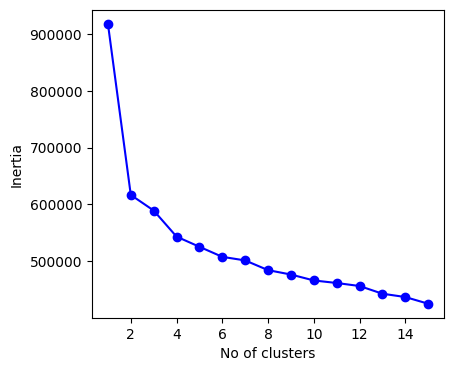

In [21]:
# elbow graph
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(range(1,16), inertia, 'bo-')
plt.xlabel('No of clusters'), plt.ylabel('Inertia')

In [22]:
silhouette_avg = []
for i in range(2,16):
    # initialise kmeans
    kmeans = KMeans(n_clusters= i)
    cluster_labels = kmeans.fit_predict(x)
    # silhouette score
    silhouette_avg.append(silhouette_score(x,cluster_labels))

In [23]:
silhouette_avg

[0.33837516300865234,
 0.21507626851615055,
 0.2169381236234442,
 0.1856049392646116,
 0.09051156421008276,
 0.10512911047007066,
 0.10553479076739368,
 0.13420841122077712,
 0.12469707263727779,
 0.13233984100262172,
 0.10835873190228633,
 0.1273676486362963,
 0.0921242760360424,
 0.11045834078428675]

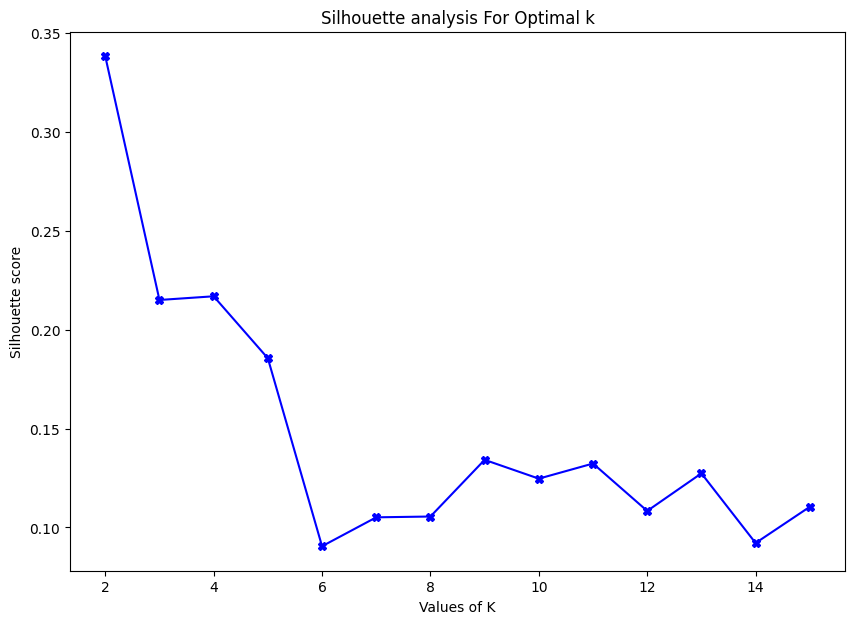

In [24]:
plt.figure(figsize=(10,7))
plt.plot(range(2,16),silhouette_avg,'bX-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

# k-means

In [25]:
 model = KMeans(n_clusters=3)
model = model.fit(x)

In [26]:
y_km = model.predict(x)
centers = model.cluster_centers_

In [27]:
y_km

array([2, 1, 2, ..., 1, 1, 1])

In [28]:
centers

array([[9.31021529, 0.26325675, 0.27958388, 0.23695998, 0.16847276,
        0.14463228, 0.14275394, 0.10692097, 0.11472331, 0.08914897,
        0.15402398, 0.35081636, 0.21644271, 0.14853345, 0.16948418,
        0.10287531, 0.32610894, 0.05187112, 0.79583875, 0.26600202,
        0.45195781, 0.25661032, 0.12339257, 0.03164283, 0.44458893,
        0.12714926, 0.09882965, 0.27134807, 0.38375957, 0.16442711,
        0.07426672, 0.05259356, 0.19823725, 0.12411501, 0.09174975,
        0.07282185],
       [0.96690825, 0.25256393, 0.23034322, 0.20737044, 0.1484343 ,
        0.13728976, 0.13305073, 0.10330918, 0.10816354, 0.10098455,
        0.13530699, 0.30370573, 0.21714755, 0.13489676, 0.15636538,
        0.1075482 , 0.27122932, 0.04430466, 0.71407083, 0.23977848,
        0.46601942, 0.24517982, 0.11582114, 0.03363873, 0.40974976,
        0.11561603, 0.10652263, 0.26480241, 0.35183919, 0.15513469,
        0.07582388, 0.05777383, 0.19014085, 0.1094626 , 0.08491727,
        0.07390948],
      

In [29]:
df['Cluster'] = pd.DataFrame(y_km)
df.to_csv("Cluster_data.csv",index=False)

In [30]:
df['Cluster'].value_counts()

Cluster
1    14626
2     8453
0     6921
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

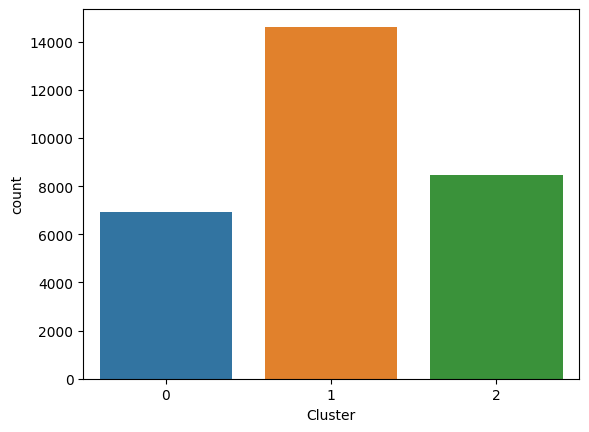

In [31]:
sns.countplot(data=df,x='Cluster')
plt.show

#ANALYZING CLUSTER

In [32]:
c_df = pd.read_csv('Cluster_data')
c_df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cluster
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,2,F,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,F,10,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,2


In [33]:
c_df['Total Search'] = c_df.iloc[:,3:38].sum(axis=1)

In [34]:
c_df

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cluster,Total Search
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
1,2,F,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2,5
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
4,5,F,10,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,1,2,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
29996,29997,M,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
29997,29998,M,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
29998,29999,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


Cluster 0 

In [35]:
cl_0 = c_df.groupby(['Cluster','Gender'],as_index=False).sum().query('Cluster == 0')
cl_0

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
0,0,F,22022521,4596,917,809,502,499,357,407,...,928,975,868,300,258,985,508,519,538,33190
1,0,M,2054325,511,100,78,42,5,6,26,...,69,21,51,4,11,126,90,46,60,3543


Text(0.5, 1.0, 'Customers count')

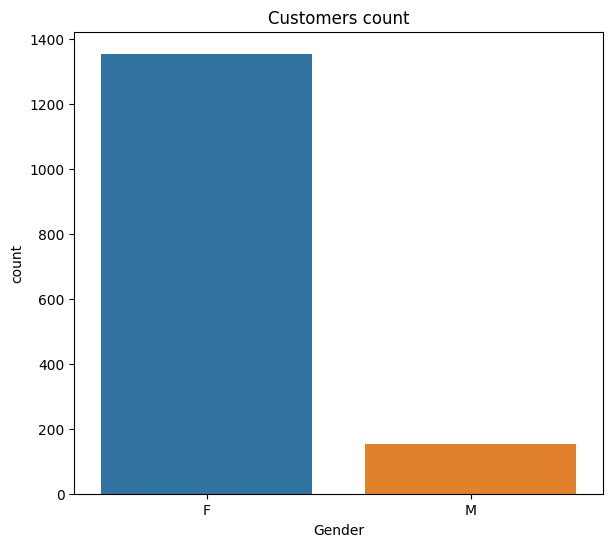

In [36]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data=c_df.query('Cluster == 0'),x='Gender')
plt.title('Customers count')

Cluster 1

In [37]:
cl_1 = c_df.groupby(['Cluster','Gender'],as_index=False).sum().query('Cluster == 1')
cl_1

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
2,1,F,195401014,17007,2868,2254,2616,2206,2006,1759,...,3435,5136,1813,991,719,2028,1277,865,675,75179
3,1,M,37487728,3755,794,1114,550,23,102,217,...,346,201,205,101,68,430,229,197,150,12782


Text(0.5, 1.0, 'Customers count')

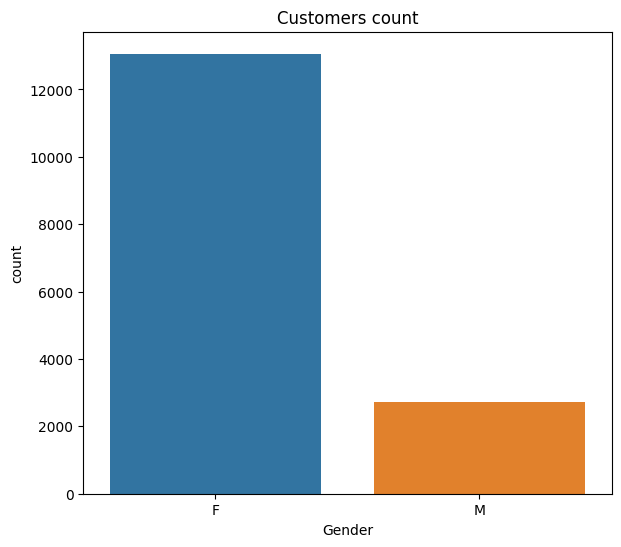

In [38]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data=c_df.query('Cluster == 1'),x='Gender')
plt.title('Customers count')

cluster 2

In [39]:
cl_2 = c_df.groupby(['Cluster','Gender'],as_index=False).sum().query('Cluster == 2')
cl_2

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
4,2,F,160248108,81027,2590,2165,2473,2087,1762,1567,...,2958,4615,1644,810,605,1747,1151,864,564,69122
5,2,M,32801304,18198,754,1150,505,20,73,217,...,398,154,188,124,59,450,236,150,140,12327


Text(0.5, 1.0, 'Customers count')

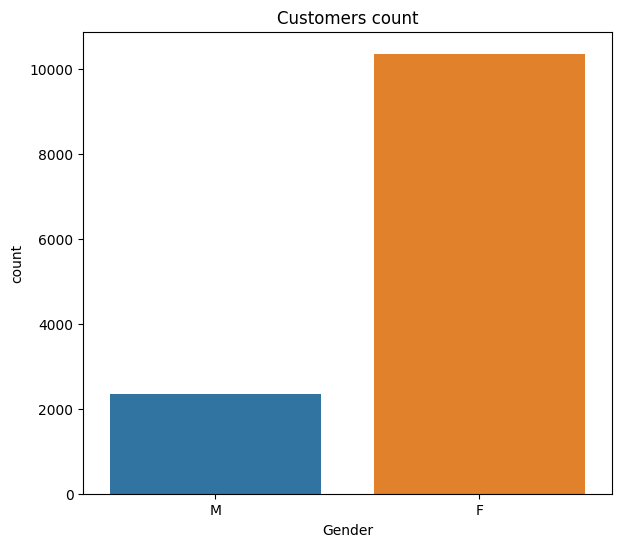

In [40]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data=c_df.query('Cluster == 2'),x='Gender')
plt.title('Customers count')

Overall Analysis

In [41]:

final_df= c_df.groupby(['Cluster','Gender'],as_index=False).sum()
final_df

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
0,0,F,22022521,4596,917,809,502,499,357,407,...,928,975,868,300,258,985,508,519,538,33190
1,0,M,2054325,511,100,78,42,5,6,26,...,69,21,51,4,11,126,90,46,60,3543
2,1,F,195401014,17007,2868,2254,2616,2206,2006,1759,...,3435,5136,1813,991,719,2028,1277,865,675,75179
3,1,M,37487728,3755,794,1114,550,23,102,217,...,346,201,205,101,68,430,229,197,150,12782
4,2,F,160248108,81027,2590,2165,2473,2087,1762,1567,...,2958,4615,1644,810,605,1747,1151,864,564,69122
5,2,M,32801304,18198,754,1150,505,20,73,217,...,398,154,188,124,59,450,236,150,140,12327


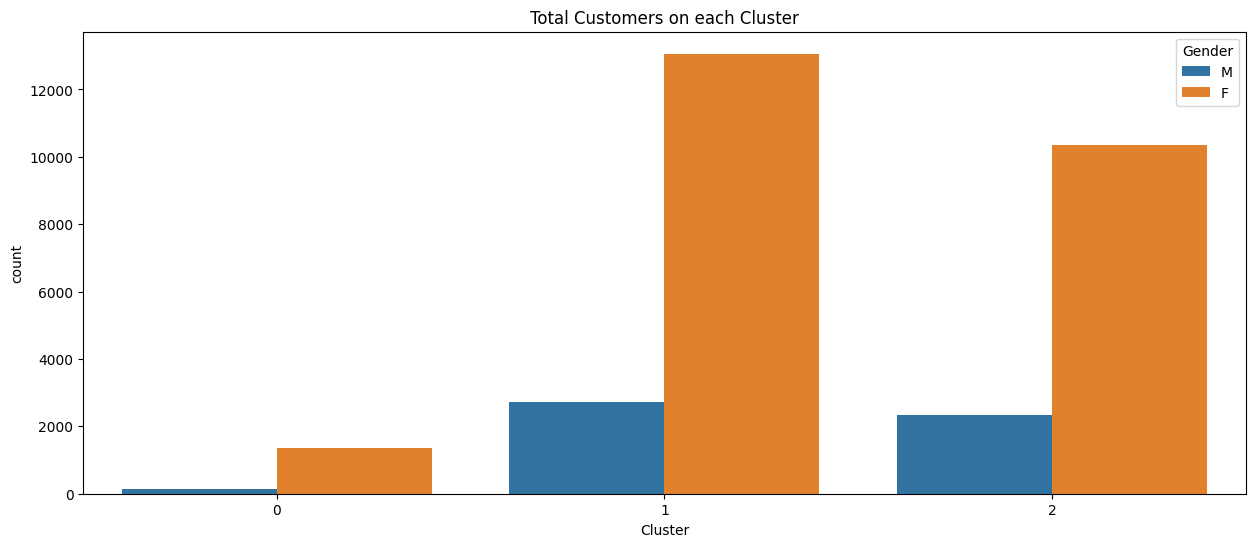

In [42]:
plt.figure(figsize=(15,6))
sns.countplot(data=c_df,x='Cluster',hue='Gender')
plt.title('Total Customers on each Cluster')
plt.show()

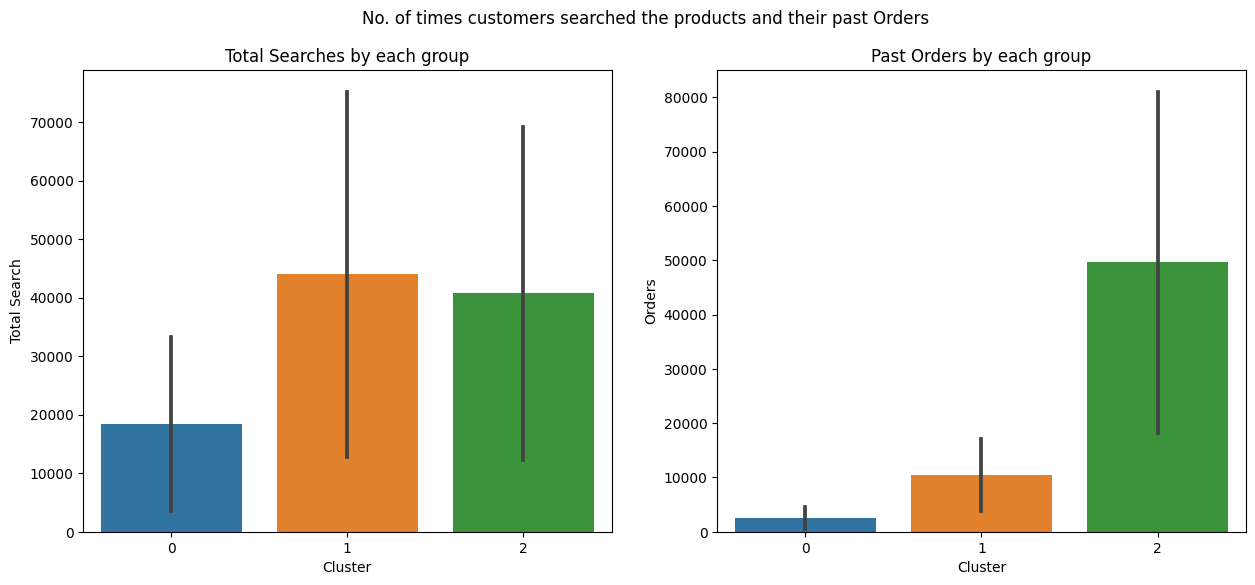

In [43]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(data=final_df,x='Cluster',y='Total Search')
plt.title('Total Searches by each group')

plt.subplot(1,2,2)
sns.barplot(data=final_df,x='Cluster',y='Orders')
plt.title('Past Orders by each group')
plt.suptitle('No. of times customers searched the products and their past Orders')
plt.show()